In [135]:
import numpy as np

In [141]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import matplotlib

We start by downloading the mnist dataset from the keras datasets api

In [142]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [143]:
train_x[0].shape

(28, 28)

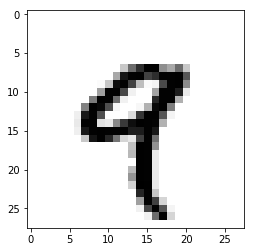

In [144]:
plt.imshow(train_x[4], cmap = matplotlib.cm.binary)

In [130]:
train_y[4]

9

We transform the (28,28) dimensional matrix to a vector of size (28*28,1)

In [145]:
def preprocess(x):
    x = x.reshape((x.shape[0], x.shape[1] * x.shape[2]))
    x = x / 255.
    return x 

def to_categorical(y, num_classes):
    res = np.zeros((y.shape[0], num_classes))
    res[np.arange(y.shape[0]), y] = 1.
    return res

In [146]:
train_x = preprocess(train_x)
train_x = train_x.T
train_y = to_categorical(train_y, 10).T

In [147]:
print(train_x.shape)
print(train_y.shape)

(784, 60000)
(10, 60000)


In [148]:
train_y[:,4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

Softmax is an activation function that outputs probabilities for multi-class classification problems. It is similar to a sigmoid output which is often used for outputing a single probability. Softmax makes sure that the sum of the individual probabilities equals to 1. 

Softmax formula:

$p_i = \dfrac{e^{a_i}}{\sum^N_{k=1} e^{a_k}}$ - Equation 1: Softmax

By using the exponential function it gives more weight to higher probabilities. It gives an advantage to higher values. Therefore it's called a soft max function. A max function would give 100% probability to the highest value, softmax is somewhere in between max and an actual probability as given by equation 2:

$p_i = \dfrac{a_i}{\sum^N_{k=1} a_k}$ - Equation 2: Standard linear probability

There is however a problem with using the regular softmax function, as it uses an exponential function chances are high that it will encounter an overflow. To overcome this, we can subtract the a values by its maximum.


In [153]:
def softmax(a):
    exp_term = np.exp(a) #-max to Prevent overflow
    res = exp_term/np.sum(exp_term, axis=0)
    return res

def cross_entropy_loss(outputs, y):
    loss = np.sum(y * np.log(outputs))
    return loss * -1./outputs.shape[1] #average loss of all samples
    
def relu(a):
    return np.maximum(0, a)

def tanh(a):
    return np.tanh(a)

def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [154]:
a = np.array([[1,2], [3,4]])
print(np.sum(a, axis=1, keepdims=False))

[3 7]


In [156]:
def forward_pass(a, W, B, activation):
    z = W.dot(a) + B
    next_a = activation(z)
    return next_a, z

In [161]:
class model():
    
    def __init__(self, input_data):
        self.learning_rate = 0.01
        self.input_data = input_data
        self.n, self.m = input_data.shape
        self.first_layer_nodes = 128
        self.output_layer_nodes = 10

        self.W1 = np.random.random((self.first_layer_nodes, self.n))
        self.B1 = np.random.random((self.first_layer_nodes, 1))
        self.W2 = np.random.random((self.output_layer_nodes, self.first_layer_nodes))
        self.B2 = np.random.random((self.output_layer_nodes, 1))
    
    def forward_pass(self): 
        self.x = self.input_data
        self.a1, self.z1 = forward_pass(self.x, self.W1, self.B1, sigmoid)
        self.a2, self.z2 = forward_pass(self.a1, self.W2, self.B2, softmax)
        return cross_entropy_loss(self.a2, train_y)
    
    def backward_pass(self, epoch):
        dz2 = (self.a2 - train_y)
        dw2 = dz2.dot(self.a1.T) * 1./self.m
        db2 = np.sum(dz2, axis=1, keepdims=True)* 1./self.m
        
        da1 = self.W2.T.dot(dz2)
        dz1 = da1 * sigmoid(self.z1) * (1 - sigmoid(self.z1))
        dw1 = dz1.dot(self.x.T)* 1./self.m
        db1 = np.sum(dz1, axis=1, keepdims=True)* 1./self.m
        self.learning_rate /= (1 + epoch * 0.1)
        self.W1 -= self.learning_rate * dw1
        self.B1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dw2
        self.B2 -= self.learning_rate * db2
        
    def error():
        pass

m = model(train_x)
for i in range(100):
    loss = m.forward_pass()
    predictions = np.argmax(m.a2, axis=0)
    correct = np.argmax(train_y, axis=0)
    print(np.sum(np.array(predictions == correct))/m.a2.shape[1])
    print(loss)

    m.backward_pass(i)
    

0.11236666666666667
3.319535322727979
0.11236666666666667
3.119375400077597
0.11236666666666667
2.9963338236731216
0.11236666666666667
2.9158882524374246
0.11236666666666667
2.8631297720859963
0.11236666666666667
2.8292817958966
0.11236666666666667
2.8082619589631705
0.11236666666666667
2.7957033103142095
0.11236666666666667
2.78851461583997
0.11236666666666667
2.784583088789321
0.11236666666666667
2.782531552684577
0.11236666666666667
2.781510356454471
0.11236666666666667
2.78102514778942
0.11236666666666667
2.780804829064821
0.11236666666666667
2.7807090835834
0.11236666666666667
2.7806691977856826
0.11236666666666667
2.78065324481846
0.11236666666666667
2.7806471092688434
0.11236666666666667
2.780644836872429
0.11236666666666667
2.780644025306147
0.11236666666666667
2.7806437454561723
0.11236666666666667
2.7806436521728997
0.11236666666666667
2.7806436220815334
0.11236666666666667
2.7806436126779857
0.11236666666666667
2.7806436098284255
0.11236666666666667
2.780643608990309
0.11236

KeyboardInterrupt: 

In [16]:
from keras.layers import Input, Dense
from keras.models import Sequential

In [115]:
km = Sequential()
km.add(Dense(128, activation='tanh', input_shape=(28*28,)))
km.add(Dense(10, activation='softmax'))
km.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [116]:
km.fit(train_x, train_y, batch_size=60000, epochs=100)

Epoch 1/100
60000/60000 [==============================] - 4s 72us/step - loss: 2.4927 - acc: 0.0895
Epoch 2/100
60000/60000 [==============================] - 0s 6us/step - loss: 2.4589 - acc: 0.0936
Epoch 3/100
60000/60000 [==============================] - 0s 8us/step - loss: 2.4282 - acc: 0.1002
Epoch 4/100
60000/60000 [==============================] - 0s 6us/step - loss: 2.4000 - acc: 0.1077
Epoch 5/100
60000/60000 [==============================] - 0s 7us/step - loss: 2.3739 - acc: 0.1165
Epoch 6/100
60000/60000 [==============================] - 0s 6us/step - loss: 2.3496 - acc: 0.1258
Epoch 7/100
60000/60000 [==============================] - 0s 7us/step - loss: 2.3267 - acc: 0.1355
Epoch 8/100
60000/60000 [==============================] - 0s 6us/step - loss: 2.3050 - acc: 0.1463
Epoch 9/100
60000/60000 [==============================] - 0s 7us/step - loss: 2.2844 - acc: 0.1580
Epoch 10/100
60000/60000 [==============================] - 0s 6us/step - loss: 2.2646 - acc: 0.170

Epoch 83/100
60000/60000 [==============================] - 0s 6us/step - loss: 1.4336 - acc: 0.6952
Epoch 84/100
60000/60000 [==============================] - 0s 6us/step - loss: 1.4266 - acc: 0.6976
Epoch 85/100
60000/60000 [==============================] - 0s 6us/step - loss: 1.4196 - acc: 0.6996
Epoch 86/100
60000/60000 [==============================] - 0s 6us/step - loss: 1.4126 - acc: 0.7017
Epoch 87/100
60000/60000 [==============================] - 0s 6us/step - loss: 1.4058 - acc: 0.7037
Epoch 88/100
60000/60000 [==============================] - 0s 6us/step - loss: 1.3990 - acc: 0.7056
Epoch 89/100
60000/60000 [==============================] - 0s 6us/step - loss: 1.3923 - acc: 0.7075
Epoch 90/100
60000/60000 [==============================] - 0s 6us/step - loss: 1.3857 - acc: 0.7096
Epoch 91/100
60000/60000 [==============================] - 0s 6us/step - loss: 1.3792 - acc: 0.7116
Epoch 92/100
60000/60000 [==============================] - 0s 6us/step - loss: 1.3727 - ac

Ref: https://deepnotes.io/softmax-crossentropy

http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/

In [31]:
a= np.array([[1,2,3],[1,4,2]])
np.argmax(a, axis=1)
a.max(axis=1, keepdims=True).shape

(2, 1)

https://github.com/2015xli/multilayer-perceptron/blob/master/multilayer-perceptron-batch.ipynb
https://jonathanweisberg.org/post/A%20Neural%20Network%20from%20Scratch%20-%20Part%201/